![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<Axes: >

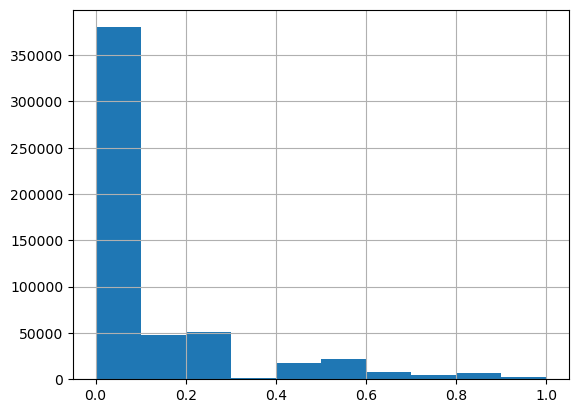

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [8]:
# Celda 1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
# Crear el vectorizador CountVectorizer
vectorizer = CountVectorizer()

In [10]:
# Aplicar CountVectorizer a los datos de entrenamiento y test
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [11]:
# Crear y entrenar el modelo de regresión
model = LinearRegression()
model.fit(X_train_count, y_train)

LinearRegression()

In [12]:
# Predecir sobre el conjunto de test
y_pred = model.predict(X_test_count)

In [13]:
# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.037224343197762196


Se cargaron los datos proporcionados por la plataforma de comentarios civiles, y se hizo un preprocesamiento del texto. Posteriormente se construyó y ejecutó un modelo de regresión para predecir la probabilidad de toxicidad en los comentarios. Por otra parte, se imprimió un histograma de la variable objetivo para visualizar su distribución.

Se utilizó CountVectorizer para tokenizar los comentarios y convertirlos y poder ser utilizados en el modelo de regresión, y se corrió el mismo con los datos de entrenamiento transformados. De igual manera se realizaron predicciones sobre el conjunto de prueba y se calculó el MSE utilizando las predicciones y los valores reales de la variable objetivo. El MSE obtenido indica la calidad del modelo de regresión en términos de cuán cerca están las predicciones del modelo de los valores reales. En este caso, el MSE es de aproximadamente 0.0372243, lo que sugiere que el modelo tiene un buen desempeño en la predicción de la probabilidad de toxicidad en los comentarios.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error

In [15]:
# Crear el vectorizador CountVectorizer con trigramas
vec_trigr = CountVectorizer(ngram_range=(3, 3))

# Aplicar CountVectorizer a los datos de entrenamiento y test
X_train_trigr = vec_trigr.fit_transform(X_train)
X_test_trigr = vec_trigr.transform(X_test)

# Crear y entrenar el modelo de regresión
model_trigr = LinearRegression()
model_trigr.fit(X_train_trigr, y_train)

# Predecir sobre el conjunto de test
y_pred_trigr = model_trigr.predict(X_test_trigr)

# Calcular el MSE
mse_trigr = mean_squared_error(y_test, y_pred_trigr)
print("Mean Squared Error (MSE) con Trigramas:", mse_trigr)

Mean Squared Error (MSE) con Trigramas: 0.03980335613865845


El MSE con triagramas dio un resultado de 0.0398, lo cual representa el error producido por el modelo al predecir la probabilidad de toxicidad en los comentarios. Debido a que el MSE utiliza el cuadrado de las diferencias, las diferencias entre las predicciones y los valores reales son penalizadas más severamente. Un MSE de 0.0398 implica que, en promedio, el cuadrado de la diferencia entre las predicciones y los valores reales es 0.0398.

Observamos que el MSE aumenta ligeramente cuando se utilizan trigramas en el CountVectorizer para preprocesar los comentarios. Esto podría indicar que la inclusión de trigramas no necesariamente mejora el rendimiento del modelo de regresión lineal para este conjunto de dato.

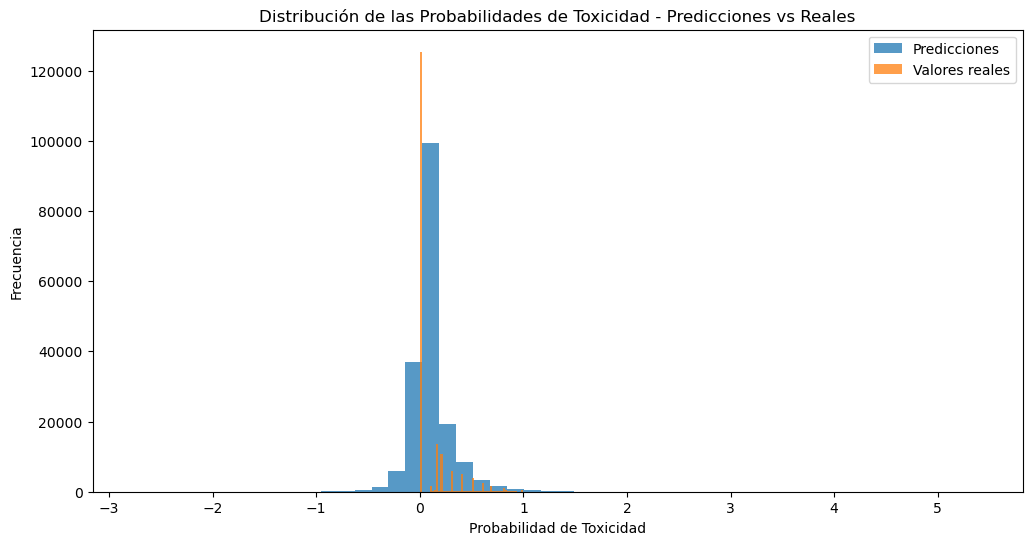

In [16]:
import matplotlib.pyplot as plt

# Visualización de predicciones
plt.figure(figsize=(12, 6))
plt.hist(y_pred, bins=50, alpha=0.75, label='Predicciones')
plt.hist(y_test, bins=50, alpha=0.75, label='Valores reales')
plt.xlabel('Probabilidad de Toxicidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución de las Probabilidades de Toxicidad - Predicciones vs Reales')
plt.show()

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

#Celda 3
### Funcionamiento de TfidfVectoriz

- Term Frequency (TF - Frecuencia de Término): Calcula la frecuencia con la que aparece un término en un documento. Básicamente, es la proporción de apariciones de un término respecto al número total de términos en un documento.


- Inverse Document Frequency (IDF - Frecuencia Inversa de Documento): Mide la rareza de un término en un conjunto de documentos. Los términos que aparecen en muchos documentos tienen un IDF bajo, mientras que los términos que aparecen en pocos documentos tienen un IDF alto. Se calcula como el logaritmo del cociente entre el número total de documentos y el número de documentos que contienen el término, con un ajuste de suavizado para evitar divisiones pc cero.


- TF-IDF: Es el producto de TF y IDF. Cuanto mayor sea el valor de TF-IDF de un término en un documento, más importante es ese término para ese documento en patic
ular.


### Ventajas de TfidfVectorizer:
- Considera la importancia de los términos: TfidfVectorizer asigna pesos a los términos en función de su importancia relativa en el documento y en el conjunto de documentos, lo que permite capturar mejor la semántica de los textos.


- Reduce la importancia de términos comunes: Los términos que aparecen en muchos documentos pero que no aportan mucha información específica (como "el", "de", etc.) tienen un peso más bajo en TF-IDF, lo que ayuda a centrarse en términos ás relevantes.


### Desventajas de TfidfVectorizer:
- Más costoso computacionalmente: Calcular TF-IDF puede ser más costoso computacionalmente en comparación con CountVectorizer, especialmente en conjuntos de datos grandes, debido a la necesidad de calcular IDF para todos los términos.


- Menos efectivo para textos cortos: En textos muy cortos, como tweets o encabezados de noticias, donde los términos son limitados, TF-IDF puede no ser tan efectivo debido a la falta desuficiente contexto.


- En resumen, TfidfVectorizer es una técnica poderosa para representar documentos de texto, ya que tiene en cuenta tanto la frecuencia de los términos en un documento como su importancia en el conjunto de documentos. Sin embargo, puede ser más costoso computacionalmente y puede no ser tan efectivo en textos muy cortos. En contraste, CountVectorizer es más simple y rápido, pero no tiene en cuenta la importancia de los términos. La elección entre estas dos técnicas dependesidades específicas del problema y de los recursos computacionales disponibles.e de las nec

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 4
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

# Aplicar TfidfVectorizer a los datos de entrenamiento y test
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

# Crear y entrenar el modelo de regresión lineal con los datos tokenizados por TfidfVectorizer
model_tfidf = LinearRegression()
model_tfidf.fit(X_train_tfidf, y_train)

# Predecir sobre el conjunto de test
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Calcular el MSE
mse_tfidf = mean_squared_error(y_test, y_pred_tfidf)
print("Mean Squared Error (MSE) with TfidfVectorizer:", mse_tfidf)

Mean Squared Error (MSE) with TfidfVectorizer: 0.0280056191603927


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [18]:
# Celda 5

Las diferentes técnicas de vectorización afectan el rendimiento y desempeño del modelo, lo cual pudimos ver en las variaciones del MSE. Los resultados obtenidos lineas arriba muestran como el preprocesamiento de texto puede afectar el desempeño de diferentes modelos, y esto a su vez la predicción de la probabilidad de toxicidad en los comentarios.

A continuación los resultados por modelo:

- CountVectorizer (unigramas):
En este modelo, el MSE obtenido fue de 0.0372. Al utilizar unigramas, se consideró palabra por palabra, que si bien puede ser útil para identificar términos específicos, puede no interpretar el contexto del texto de manera amplia.

- CountVectorizer (trigramas):
El MSE obtenido fue ligeramente más alto que el modelo de unigramas: 0.0398. La inclusión de trigramas puede capturar mejor la estructura del texto, sin embargo, aumenta la dimensionalidad de los datos, lo que puede afectar la capacidad del modelo para generalizar.

- TfidfVectorizer:
El MSE obtenido fue el más bajo de los tres modelos, con un valor de 0.0280. TfidfVectorizer asigna pesos a los términos en función de su importancia relativa en el documento y en el conjunto de documentos, lo que permite capturar mejor la semántica del texto. Además, reduce la importancia de los términos comunes, lo que puede ayudar al modelo a enfocarse en términos más relevantes.
En sintesis, el preprocesamiento de texto con técnicas como TfidfVectorizer puede mejorar significativamente el desempeño de un modelo de regresión en la tarea de predicción de toxicidad en comentarios.

Dicho lo anterior, este último modelo (TfidfVectorizer) predijo más precisamente la probabilidad de que un comentario sea tóxico.